# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score
from imblearn.over_sampling import RandomOverSampler
import warnings
from sklearn.exceptions import FitFailedWarning
warnings.simplefilter('ignore', FitFailedWarning)

# Importing Dataset

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# No Missing Values

In [4]:
df.isna().any().any()

False

# Encoding Categorical Values

In [5]:
#Columns with string values
categorical_column = ['Attrition', 'BusinessTravel', 'Department','Gender', 'JobRole', 'MaritalStatus', 'OverTime','EducationField']
encoder=LabelEncoder()
df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)

# Seperating into X and y

In [6]:
y=df['Attrition']
X=df.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)

In [7]:
ros = RandomOverSampler(random_state=42)
X_, y = ros.fit_resample(X,y)
X = pd.DataFrame(X_,columns=X.columns)

# Spliting into Train and Test Sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Applying Random Forest

In [9]:
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred))
  print("Recall: ",recall_score(y_test,y_pred))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
# Setting random state for randomization
rf = RandomForestClassifier(random_state=42)


# Hyperparameter Tuning

Randomized Search Cross Validation

In [11]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 150, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Creating random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [12]:

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, 
                               random_state=42, n_jobs = -1)


In [13]:

train_predict_evaluate (rf_random, X_train, y_train, X_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\varad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [0.89975644 0.93509662        nan        nan 0.91133957 0.93161836
 0.95654086        nan 0.94842995 0.93103965        nan        nan
        nan 0.89918076 0.95306461 0.90902778 0.94785024        nan
 0.93046095 0.94379026        nan        nan 0.89859702 0.95190419
 0.95075081 0.95016506        nan 0.89628019 0.93509662 0.89975845
        nan 0.95190419        nan        nan        nan 0.94901067
 0.92524356 0.93046196 0.95248591 0.94669183        nan        nan
        nan        nan 0.9461091  0.89859903        nan        nan
 0.94379026        nan        nan        nan        nan        nan
        nan        nan 0.90496981        nan 0.95190419        nan
 0.94900765 0.93857387 0.94495068 0.91133957        nan        nan
        nan 0.92408716 0.94901067        nan        nan 0.94726952
 0.95132448 0.93046095

Accuracy:  0.9783783783783784
Precision:  0.9796954314720813
Recall:  0.9796954314720813
Confusion Matrix:
 [[338   8]
 [  8 386]]


In [14]:

rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 103,
 'bootstrap': False}

Grid Search Cross Validation

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [False],
    'max_depth': [100, 105, 110, 115],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,3,4],
    'n_estimators': [250,300,350,400]
}

In [16]:

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


train_predict_evaluate (grid_search, X_train, y_train, X_test)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Accuracy:  0.9783783783783784
Precision:  0.9796954314720813
Recall:  0.9796954314720813
Confusion Matrix:
 [[338   8]
 [  8 386]]


In [17]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 100,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 250}

In [18]:
best_rf = RandomForestClassifier(bootstrap=False, max_depth=100, 
                                 min_samples_leaf=1,min_samples_split=2, 
                                 n_estimators=250, random_state=42)
train_predict_evaluate (best_rf, X_train, y_train, X_test)

Accuracy:  0.9783783783783784
Precision:  0.9796954314720813
Recall:  0.9796954314720813
Confusion Matrix:
 [[338   8]
 [  8 386]]


# K-Fold Cross Validation

In [19]:
def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))

  print("Accuracy: ", np.mean(scores['test_accuracy']))
  print("Precision: ", np.mean(scores['test_precision']))
  print("Recall: ", np.mean(scores['test_recall']))
  print("F1 Score: ", np.mean(scores['test_f1']))


Performing K-Fold Cross Validation on our model

In [20]:
cross_validation(rf, X, y)

Accuracy:  0.9760764057123618
Precision:  0.9565186465220676
Recall:  0.9975708502024292
F1 Score:  0.9765936592741291


In [21]:
cross_validation(best_rf, X, y)

Accuracy:  0.9914848362910709
Precision:  0.9856088402213505
Recall:  0.9975708502024292
F1 Score:  0.9915361442773062


# Analysis

In [22]:
feature_imp = pd.Series(best_rf.feature_importances_, index=list(X.columns)).sort_values(ascending=False)
print(feature_imp)

MonthlyIncome               0.084630
OverTime                    0.072909
Age                         0.055818
TotalWorkingYears           0.051680
DailyRate                   0.048299
MonthlyRate                 0.046178
HourlyRate                  0.042808
YearsAtCompany              0.041995
DistanceFromHome            0.041573
StockOptionLevel            0.039173
NumCompaniesWorked          0.037973
JobRole                     0.036040
PercentSalaryHike           0.033351
YearsWithCurrManager        0.032969
YearsInCurrentRole          0.031812
EnvironmentSatisfaction     0.030169
JobSatisfaction             0.029094
RelationshipSatisfaction    0.025802
YearsSinceLastPromotion     0.024207
JobLevel                    0.024032
MaritalStatus               0.023560
TrainingTimesLastYear       0.022936
JobInvolvement              0.021798
WorkLifeBalance             0.020486
EducationField              0.019654
Education                   0.019556
BusinessTravel              0.014242
D

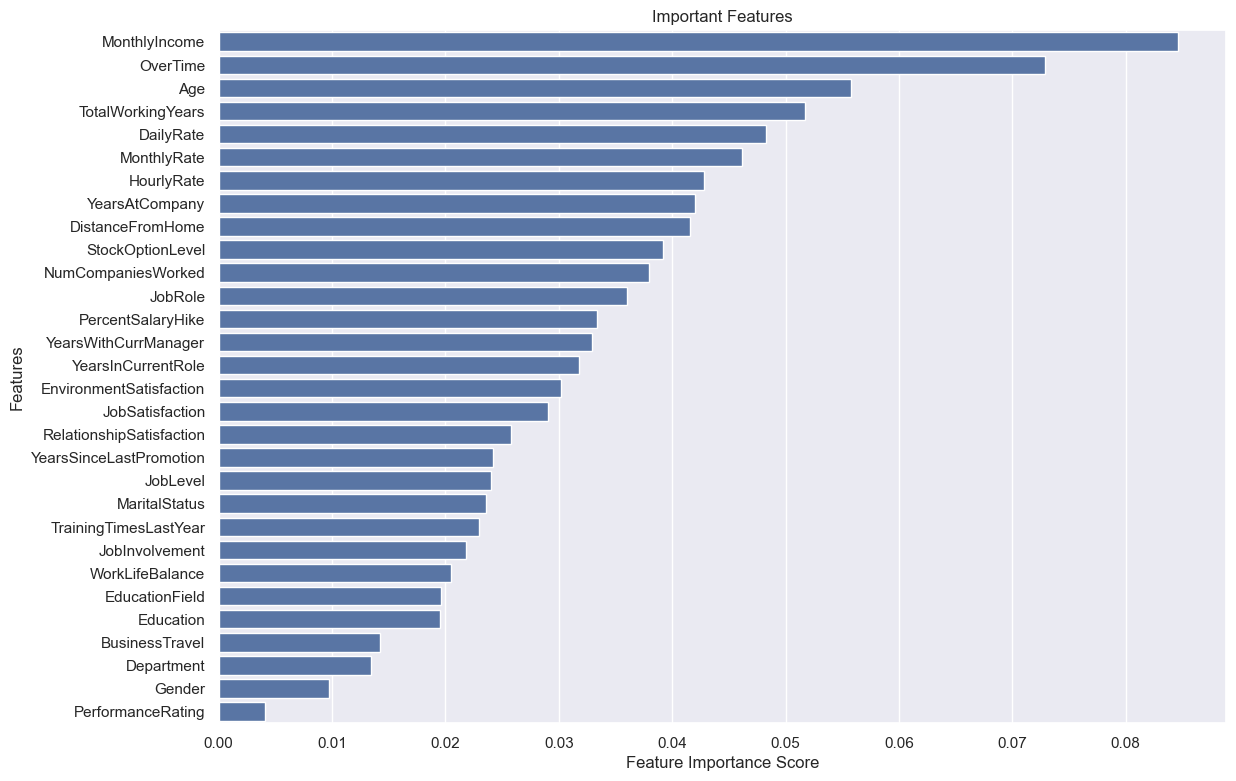

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot using sns
sns.set(rc={'figure.figsize':(13,9)})
sns.barplot(x=feature_imp, y=feature_imp.index)

# Adding labels
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")

# Displaying the plot
plt.show()